In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder 
import seaborn as sns
import sklearn
print(sklearn.__version__)
from sklearn.ensemble import ExtraTreesClassifier

0.23.1


In [2]:
df = pd.read_csv(r'F:\SOMETHING\kdd99_20.csv', index_col=None)

In [3]:
df.shape

(25192, 42)

In [4]:
print("Read {} rows.".format(len(df)))

Read 25192 rows.


In [5]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,score
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,19.487695
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,2.328541
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [6]:
df.dropna(inplace=True,axis=1)
df1 = df.drop('score',axis = 1)

In [7]:
df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [9]:
df2 = df1.head(10000)
df2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,tcp,uucp_path,S0,0,0,0,0,0,0,...,255,6,0.02,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9996,0,tcp,http,SF,227,318,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
9997,0,udp,domain_u,SF,44,126,0,0,0,0,...,255,252,0.99,0.00,0.00,0.00,0.00,0.00,0.00,normal
9998,0,tcp,private,REJ,0,0,0,0,0,0,...,255,8,0.03,0.00,0.00,0.00,0.00,1.00,1.00,neptune


In [10]:
print(df1['outcome'].value_counts())

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
multihop               2
phf                    2
loadmodule             1
ftp_write              1
spy                    1
land                   1
Name: outcome, dtype: int64


In [11]:
def bar_graph(feature):
    df2[feature].value_counts().plot(kind="bar")

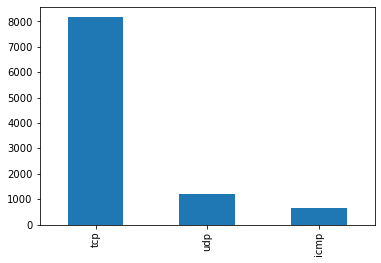

In [12]:
bar_graph('protocol_type')

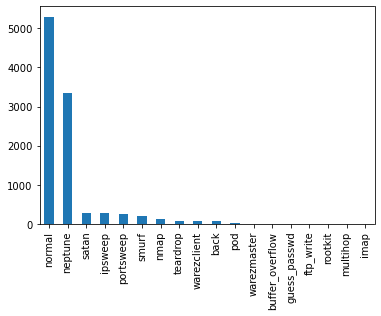

In [13]:
bar_graph('outcome')

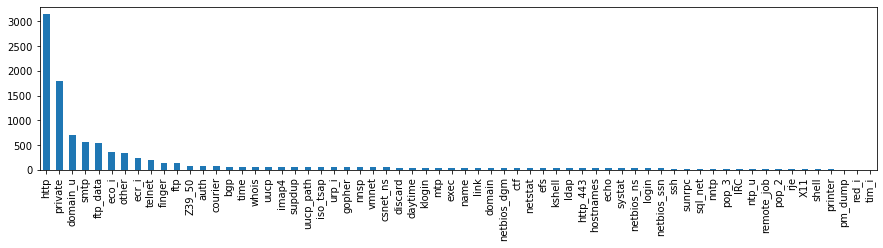

In [14]:
plt.figure(figsize=(15,3))
bar_graph('service')

In [15]:
attacks_types = {
'normal':'normal', 
'neptune':'dos',
'ipsweep':'probe',
'satan': 'probe',
'portsweep':'probe',
'smurf':'dos',
'nmap':'probe',
'back': 'r2l',
'teardrop':'dos',
'warezclient': 'r2l',
'pod':'dos',
'guess_passwd': 'r2l',
'warezmaster': 'r2l',
'buffer_overflow':'u2r',
'imap': 'r2l',
'rootkit':'u2r',            
'phf': 'r2l',
'multihop': 'r2l',
'ftp_write': 'r2l',
'land':'dos',
'spy': 'r2l',
'loadmodule':'u2r'            
}

In [16]:
df2 = pd.DataFrame(df1) 
df2['Attacks'] = df2['outcome'].map(attacks_types) 

In [17]:
df2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,Attacks
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.17,0.00,0.00,0.00,0.05,0.00,normal,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.88,0.00,0.00,0.00,0.00,0.00,normal,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.00,0.00,1.00,1.00,0.00,0.00,neptune,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.00,0.00,0.00,0.00,1.00,1.00,neptune,dos
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,1.00,0.18,0.00,0.00,0.00,0.00,warezclient,r2l
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.00,0.00,0.00,0.00,1.00,1.00,neptune,dos
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.00,0.00,1.00,1.00,0.00,0.00,neptune,dos


In [18]:
df2.shape

(25192, 42)

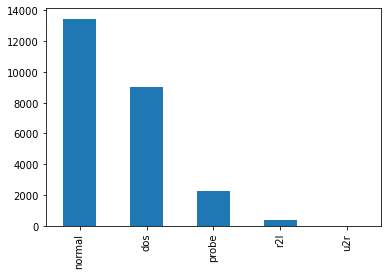

In [19]:
bar_graph('Attacks')

In [20]:
df2.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome',
       'Attacks'],
      dtype='object')

In [21]:
#'num_outbound_cmds' is a redundant column so remove it from both train & test datasets

df2 = df2.drop(['num_outbound_cmds','is_host_login'],axis = 1)

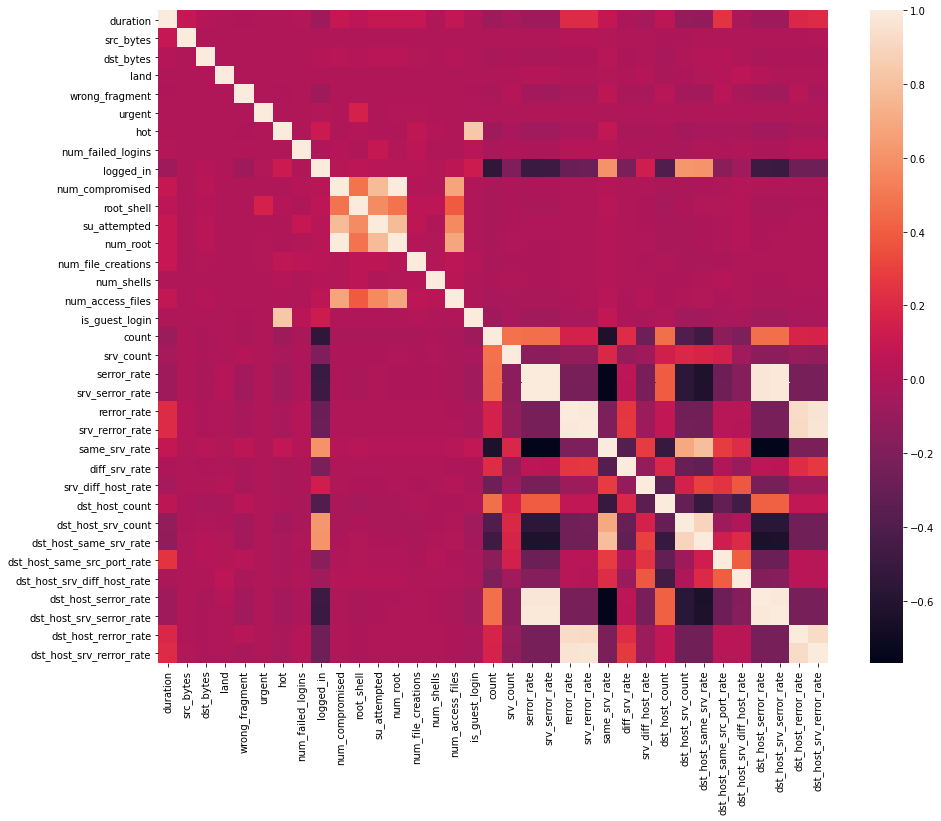

In [22]:
df2 = df2.dropna('columns')
corr = df2.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [23]:
df3 = df2.drop(['outcome'],axis = 1)

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

# Feature Engineering

In [25]:
# scaling numerical values 

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = df3.select_dtypes(include=['float64','int64']).columns

In [27]:
print(cols)

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


In [28]:
sc_df = scaler.fit_transform(df3.select_dtypes(include=['float64','int64']))

In [29]:
print(sc_df)

[[-0.11355066 -0.00988885 -0.03930979 ... -0.62736475 -0.22166806
  -0.37428075]
 [-0.11355066 -0.01003196 -0.03930979 ... -0.62736475 -0.38513984
  -0.37428075]
 [-0.11355066 -0.01009252 -0.03930979 ...  1.61445359 -0.38513984
  -0.37428075]
 ...
 [-0.11355066 -0.01009252 -0.03930979 ... -0.62736475  2.88429591
   2.77704096]
 [-0.11355066 -0.01009252 -0.03930979 ...  1.61445359 -0.38513984
  -0.37428075]
 [-0.11355066 -0.01009252 -0.03930979 ...  1.61445359 -0.38513984
  -0.37428075]]


In [30]:
sc_df = pd.DataFrame(sc_df, columns = cols)

In [31]:
print(sc_df)

       duration  src_bytes  dst_bytes     land  wrong_fragment    urgent  \
0     -0.113551  -0.009889  -0.039310 -0.00891       -0.091223 -0.006301   
1     -0.113551  -0.010032  -0.039310 -0.00891       -0.091223 -0.006301   
2     -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
3     -0.113551  -0.009996   0.052473 -0.00891       -0.091223 -0.006301   
4     -0.113551  -0.010010  -0.034582 -0.00891       -0.091223 -0.006301   
...         ...        ...        ...      ...             ...       ...   
25187 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
25188 -0.113551  -0.009954  -0.039310 -0.00891       -0.091223 -0.006301   
25189 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
25190 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
25191 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   

            hot  num_failed_logins  logged_in  num_compromised  ...  \
0     -0.091933 

In [32]:
# encoding catgorical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cat_df = df3.select_dtypes(include=['object']).copy()

In [33]:
print(cat_df)

      protocol_type   service  flag Attacks
0               tcp  ftp_data    SF  normal
1               udp     other    SF  normal
2               tcp   private    S0     dos
3               tcp      http    SF  normal
4               tcp      http    SF  normal
...             ...       ...   ...     ...
25187           tcp      exec  RSTO     dos
25188           tcp  ftp_data    SF     r2l
25189           tcp   private   REJ     dos
25190           tcp      nnsp    S0     dos
25191           tcp    finger    S0     dos

[25192 rows x 4 columns]


In [34]:
df_cat = cat_df.apply(encoder.fit_transform)

In [35]:
print(df_cat)

       protocol_type  service  flag  Attacks
0                  1       19     9        1
1                  2       41     9        1
2                  1       46     5        0
3                  1       22     9        1
4                  1       22     9        1
...              ...      ...   ...      ...
25187              1       16     2        0
25188              1       19     9        3
25189              1       46     1        0
25190              1       38     5        0
25191              1       17     5        0

[25192 rows x 4 columns]


In [36]:
df_ids = pd.concat([sc_df,df_cat],axis = 1)

In [37]:
print(df_ids)

       duration  src_bytes  dst_bytes     land  wrong_fragment    urgent  \
0     -0.113551  -0.009889  -0.039310 -0.00891       -0.091223 -0.006301   
1     -0.113551  -0.010032  -0.039310 -0.00891       -0.091223 -0.006301   
2     -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
3     -0.113551  -0.009996   0.052473 -0.00891       -0.091223 -0.006301   
4     -0.113551  -0.010010  -0.034582 -0.00891       -0.091223 -0.006301   
...         ...        ...        ...      ...             ...       ...   
25187 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
25188 -0.113551  -0.009954  -0.039310 -0.00891       -0.091223 -0.006301   
25189 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
25190 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
25191 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   

            hot  num_failed_logins  logged_in  num_compromised  ...  \
0     -0.091933 

In [38]:
df_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  float64
 1   src_bytes                    25192 non-null  float64
 2   dst_bytes                    25192 non-null  float64
 3   land                         25192 non-null  float64
 4   wrong_fragment               25192 non-null  float64
 5   urgent                       25192 non-null  float64
 6   hot                          25192 non-null  float64
 7   num_failed_logins            25192 non-null  float64
 8   logged_in                    25192 non-null  float64
 9   num_compromised              25192 non-null  float64
 10  root_shell                   25192 non-null  float64
 11  su_attempted                 25192 non-null  float64
 12  num_root                     25192 non-null  float64
 13  num_file_creatio

# Target and variables 

In [39]:
X = df_ids.drop(['Attacks'], axis=1)
y = df_ids["Attacks"]

In [40]:
X.shape

(25192, 38)

In [41]:
y.shape

(25192,)

# FEATURE SELECTION

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

In [43]:
model.fit(X,y)

ExtraTreesClassifier()

In [44]:
print(model.feature_importances_)

[3.66729750e-03 2.15563114e-02 8.17806013e-03 3.86066282e-05
 1.52715491e-02 7.87829085e-05 8.01241444e-03 2.70320766e-04
 5.43473963e-02 6.87144142e-03 2.85241748e-04 3.08154515e-05
 3.89493366e-04 2.29473718e-04 3.53330082e-05 1.07857627e-04
 1.33447259e-03 3.68220350e-02 2.19420220e-02 5.92382243e-02
 6.51604586e-02 1.62352341e-02 2.11311628e-02 1.34560285e-01
 3.64449181e-02 1.24422664e-02 2.80570786e-02 3.76216183e-02
 3.69925205e-02 4.00022076e-02 1.85999387e-02 9.33913870e-02
 6.63410656e-02 2.98376373e-02 2.02876343e-02 4.10913635e-02
 2.12194751e-02 4.18765989e-02]


In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [46]:
rfc.fit(X,y)

RandomForestClassifier()

In [47]:
score = np.round(rfc.feature_importances_,3)
print(score)
importances = pd.DataFrame({'feature':X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)

[0.004 0.17  0.062 0.    0.007 0.    0.007 0.    0.012 0.004 0.    0.
 0.    0.    0.    0.    0.001 0.047 0.029 0.04  0.03  0.007 0.005 0.116
 0.088 0.003 0.015 0.039 0.03  0.036 0.02  0.039 0.048 0.017 0.014 0.028
 0.028 0.054]
                             importance
feature                                
src_bytes                         0.170
same_srv_rate                     0.116
diff_srv_rate                     0.088
dst_bytes                         0.062
flag                              0.054
dst_host_srv_serror_rate          0.048
count                             0.047
serror_rate                       0.040
dst_host_serror_rate              0.039
dst_host_srv_count                0.039
dst_host_same_src_port_rate       0.036
srv_serror_rate                   0.030
dst_host_same_srv_rate            0.030
srv_count                         0.029
service                           0.028
protocol_type                     0.028
dst_host_srv_diff_host_rate       0.020
dst_host_r

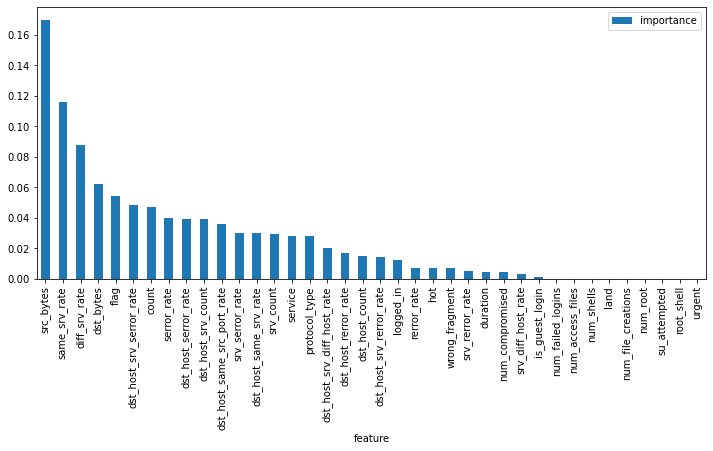

In [48]:
plt.rcParams['figure.figsize'] = (12, 5)
importances.plot.bar()

In [49]:
from sklearn.feature_selection import RFE
import itertools

In [50]:
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(X,y)

In [51]:
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X.columns)]

In [52]:
print(feature_map)

[(False, 'duration'), (True, 'src_bytes'), (True, 'dst_bytes'), (False, 'land'), (False, 'wrong_fragment'), (False, 'urgent'), (False, 'hot'), (False, 'num_failed_logins'), (False, 'logged_in'), (False, 'num_compromised'), (False, 'root_shell'), (False, 'su_attempted'), (False, 'num_root'), (False, 'num_file_creations'), (False, 'num_shells'), (False, 'num_access_files'), (False, 'is_guest_login'), (True, 'count'), (True, 'srv_count'), (False, 'serror_rate'), (False, 'srv_serror_rate'), (False, 'rerror_rate'), (False, 'srv_rerror_rate'), (True, 'same_srv_rate'), (True, 'diff_srv_rate'), (False, 'srv_diff_host_rate'), (False, 'dst_host_count'), (True, 'dst_host_srv_count'), (False, 'dst_host_same_srv_rate'), (True, 'dst_host_same_src_port_rate'), (True, 'dst_host_srv_diff_host_rate'), (True, 'dst_host_serror_rate'), (True, 'dst_host_srv_serror_rate'), (True, 'dst_host_rerror_rate'), (False, 'dst_host_srv_rerror_rate'), (True, 'protocol_type'), (True, 'service'), (True, 'flag')]


In [53]:
selected_features = [v for i, v in feature_map if i==True]

In [54]:
 print(selected_features)

['src_bytes', 'dst_bytes', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'protocol_type', 'service', 'flag']


In [55]:
pd.Series(selected_features)

0                       src_bytes
1                       dst_bytes
2                           count
3                       srv_count
4                   same_srv_rate
5                   diff_srv_rate
6              dst_host_srv_count
7     dst_host_same_src_port_rate
8     dst_host_srv_diff_host_rate
9            dst_host_serror_rate
10       dst_host_srv_serror_rate
11           dst_host_rerror_rate
12                  protocol_type
13                        service
14                           flag
dtype: object

In [56]:
X.columns
X=X[['src_bytes', 'dst_bytes', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate', 'protocol_type', 'service', 'flag']]

In [57]:
X.shape

(25192, 15)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70)

In [59]:
X_train.shape

(17634, 15)

In [60]:
print(y_train.shape)
print(y_train)

(17634,)
19462    0
2864     1
10617    0
9191     1
9881     1
        ..
25164    1
20818    0
6368     0
24113    1
12363    1
Name: Attacks, Length: 17634, dtype: int32


# KNeighborsClassifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
KNN_Classifier = KNeighborsClassifier()
KNN_Classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [63]:
score = KNN_Classifier.score(X_train, y_train)
print('Score : %.2f%%' % (score*100))

Score : 99.06%


In [64]:
y_pred1 = KNN_Classifier.predict(X_test)

In [65]:
result1 = metrics.accuracy_score(y_pred1,y_test)
result1 = (result1*100.0)
print("Accuracy - Test set: %.2f%%" % (result1))

Accuracy - Test set: 98.49%


In [66]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2702
           1       0.99      0.99      0.99      4045
           2       0.94      0.99      0.96       696
           3       0.88      0.81      0.84       115
           4       0.00      0.00      0.00         0

    accuracy                           0.98      7558
   macro avg       0.76      0.75      0.76      7558
weighted avg       0.99      0.98      0.99      7558

[[2658   17   27    0    0]
 [   2 4006   20   13    4]
 [   1    8  687    0    0]
 [   0   21    0   93    1]
 [   0    0    0    0    0]]


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DecisionTreeClassifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
DTC = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [69]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [70]:
score2 = DTC.score(X_train, y_train)
print('Score2 : %.2f%%' % (score2*100))

Score2 : 97.27%


In [71]:
y_pred2 = DTC.predict(X_test)

In [72]:
result2 = metrics.accuracy_score(y_pred2,y_test)
result2 = (result2*100.0)
print("Accuracy - Test set: %.2f%%" % (result2))

Accuracy - Test set: 97.38%


In [73]:
print(classification_report(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2625
           1       0.99      0.98      0.98      4082
           2       0.96      0.89      0.92       795
           3       0.52      0.98      0.68        56
           4       0.00      0.00      0.00         0

    accuracy                           0.97      7558
   macro avg       0.69      0.77      0.71      7558
weighted avg       0.98      0.97      0.97      7558

[[2604   21    0    0    0]
 [   7 3995   28   49    3]
 [  50   35  706    2    2]
 [   0    1    0   55    0]
 [   0    0    0    0    0]]


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM

In [74]:
from sklearn.svm import SVC

In [75]:
SVM = SVC(gamma = 'scale')

In [76]:
SVM.fit(X_train, y_train)

SVC()

In [77]:
score3 = SVM.score(X_train, y_train)
print('Score : %.2f%%' % (score3*100))

Score : 94.31%


In [78]:
y_pred3 = SVM.predict(X_test)

In [79]:
result3 = metrics.accuracy_score(y_pred3,y_test)
result3 = (result3*100.0)
print("Accuracy - Test set: %.2f%%" % (result3))

Accuracy - Test set: 94.48%


In [80]:
print(classification_report(y_pred3,y_test))
print(confusion_matrix(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2668
           1       0.99      0.93      0.96      4291
           2       0.75      0.93      0.83       597
           3       0.02      1.00      0.04         2
           4       0.00      0.00      0.00         0

    accuracy                           0.94      7558
   macro avg       0.55      0.77      0.56      7558
weighted avg       0.96      0.94      0.95      7558

[[2587   19   59    3    0]
 [  66 3998  121  101    5]
 [   8   35  554    0    0]
 [   0    0    0    2    0]
 [   0    0    0    0    0]]


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GradientBoostingClassifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
GBC = GradientBoostingClassifier(random_state=0)

In [83]:
GBC.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [84]:
score4 = GBC.score(X_train, y_train)
print('Score : %.2f%%' % (score4*100))

Score : 99.94%


In [85]:
y_pred4 = GBC.predict(X_test)

In [86]:
result4 = metrics.accuracy_score(y_pred4,y_test)
result4 = (result4*100.0)
print("Accuracy - Test set: %.2f%%" % (result4))

Accuracy - Test set: 99.58%


In [87]:
print(classification_report(y_pred4,y_test))
print(confusion_matrix(y_pred4,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2658
           1       1.00      0.99      1.00      4069
           2       0.99      0.99      0.99       733
           3       0.90      0.99      0.94        96
           4       0.40      1.00      0.57         2

    accuracy                           1.00      7558
   macro avg       0.86      0.99      0.90      7558
weighted avg       1.00      1.00      1.00      7558

[[2658    0    0    0    0]
 [   2 4046    9   11    1]
 [   1    5  725    0    2]
 [   0    1    0   95    0]
 [   0    0    0    0    2]]



# Artificial Neural Network


In [110]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

In [96]:
print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.0


In [100]:
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(15,input_dim =15,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [101]:
ANN = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

In [102]:
ANN.fit(X_train, y_train.values.ravel())

Epoch 1/100
276/276 [==============================] - 0s 2ms/step - loss: 1.5182 - accuracy: 0.3820
Epoch 2/100
276/276 [==============================] - 0s 2ms/step - loss: 1.3178 - accuracy: 0.5329
Epoch 3/100
276/276 [==============================] - 0s 2ms/step - loss: 1.1440 - accuracy: 0.5329
Epoch 4/100
276/276 [==============================] - 0s 2ms/step - loss: 0.9447 - accuracy: 0.7239
Epoch 5/100
276/276 [==============================] - 0s 2ms/step - loss: 0.7593 - accuracy: 0.8740
Epoch 6/100
276/276 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.8777
Epoch 7/100
276/276 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.8776
Epoch 8/100
276/276 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.8775
Epoch 9/100
276/276 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.8775
Epoch 10/100
276/276 [==============================] - 0s 2ms/step - loss: 0.5057 - accura

In [116]:
y_pred5 = ANN.predict(X_test)

In [119]:
result5 = accuracy_score(y_test,Y_test_pred7)
result5 = (result5*100)
print("Accuracy - Test set: %.2f%%" % (result5))

Accuracy - Test set: 96.19%


In [118]:
print(classification_report(y_pred5,y_test))
print(confusion_matrix(y_pred5,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2648
           1       0.99      0.96      0.97      4162
           2       0.89      0.87      0.88       748
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.96      7558
   macro avg       0.57      0.56      0.57      7558
weighted avg       0.98      0.96      0.97      7558

[[2624    2   22    0    0]
 [   2 3993   59  103    5]
 [  35   57  653    3    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<BarContainer object of 5 artists>

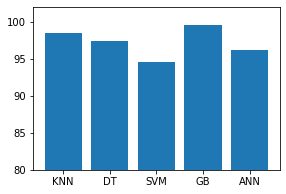

In [120]:
names = ['KNN','DT','SVM','GB','ANN']
values = [98.49,97.38, 94.48, 99.58, 96.19]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)